In [1]:
import csv
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

# 💡 Workbook 04

In [2]:
file_name = "beams.txt"
beam_id = 0

This week we are working with a slightly new file format, it looks like this:

<pre>
Length, [E, I]
<b>P, pin support locations (comma separated)</b>
<b>F, fixed support locations (comma separated)</b>
Load Magnitude, Load Start, Load Order, [Load End]
Load Magnitude, Load Start, Load Order, [Load End]

Length, [E, I]
<b>P, pin support locations (comma separated)</b>
<b>F, fixed support locations (comma separated)</b>
Load Magnitude, Load Start, Load Order, [Load End]
Load Magnitude, Load Start, Load Order, [Load End]

...etc.
</pre>
Here is an example of what the format looks like with real data:

```
168,3850,42
P,0,168
120,0,0
240,0,0
              # Note the blank line between beam data
142,3850,42
P,0,120
F,0
120,0,0
240,0,0
```

Characteristics of the new file format include:
* Multiple beams in one file
* Beams can have either pin, fixed, or both kinds of supports
* There is an empty space between different beams

# Part A

Using the "csv reader" recipe, read in the file "beams.txt" into your accumulator.

Print the contents of your accumulator to the notebook

## Task A Response

In [3]:
lines = []
with open(file_name, "r") as file:
    csv_file = csv.reader(file)
    for line in csv_file:
        lines.append(line)
print(lines)

[['4800', '19200', '1000000'], ['P', '3600'], ['F', '0'], ['100', '2000', '0'], [], ['228', '28000', '756'], ['P', '63', '100', '200'], ['150', '0', '0'], ['350', '0', '0'], [], ['9000', '35000', '1000000000'], ['F', '1000'], ['P', '9000'], ['12', '0', '0'], ['24', '0', '0']]


# Part B

Using the "filter" recipe, write a loop that will convert all of the numbers in your "beams" data to integers. Note, trying to convert a string like, `"F"` into an integer will result in an error so you will need to use `if`/`elif`/`else` to check if a string can be converted into an `int`. 

Unfortunately, the Python str methods are not comprehensive enough on their own to cover every kind of number test so you may have to get creative on how you test the string (e.g. may require manipulation). 

Print the results of your accumulator to the notebook to see if it caught all of the numbers. If

You may also need to use the "double loop" recipe or you may try using a list comprehension to avoid writing a double loop.



## Task B response

### Method 1 - Double loop

In [4]:
clean_lines = []
for line in lines:
    clean_line = []
    for string in line:
        if string.replace("-","").isdigit():
            clean_line.append(int(string))
        else:
            clean_line.append(string)
    clean_lines.append(clean_line)
print(clean_lines)

[[4800, 19200, 1000000], ['P', 3600], ['F', 0], [100, 2000, 0], [], [228, 28000, 756], ['P', 63, 100, 200], [150, 0, 0], [350, 0, 0], [], [9000, 35000, 1000000000], ['F', 1000], ['P', 9000], [12, 0, 0], [24, 0, 0]]


### Method  2 - List comprehension

In [5]:
clean_lines = []
for line in lines:
    clean_lines.append(
        [int(item) if item.replace("-","").isdigit() else item for item in line]
    )
print(clean_lines)

[[4800, 19200, 1000000], ['P', 3600], ['F', 0], [100, 2000, 0], [], [228, 28000, 756], ['P', 63, 100, 200], [150, 0, 0], [350, 0, 0], [], [9000, 35000, 1000000000], ['F', 1000], ['P', 9000], [12, 0, 0], [24, 0, 0]]


# Part C

Create a new `list` accumulator called `beams`.

The goal of this loop is to separate out each chunk of beam data into its own sub-list so that the data from each beam is separate from each other. So, the structure of `beams` will be as follows:

```python
beams = [
    [ # "Beam 1" sub-list starts here
        [L_b1, E_b1, I_b1],
        [P_supports], # If any
        [F_supports], # If any
        [Load assignments], # If any
        [Load assignments]
        [Load assignments...]
    ], # End of "Beam 1"
    
    [ # "Beam 2" sub-list starts here
        [L_b2, E_b2, I_b2],
        [P_supports], # If any
        [F_supports], # If any
        [Load assignments], # If any
        [Load assignments]
        [Load assignments...]
    ], # End of "Beam 2"
]# End of of 'beams'
```

By reviewing the structure of your data, use a series of `if`/`elif`/`else` to come up with series of tests to "chunk up" your beam data into sub-lists. I think that solving problems like these is part of the "essence" of programming.

The goal is that you will be able to use indexing on your new `beams` variable to access just the beam data for that beam, e.g. `beam[0]` or `beam[2]`.

Try printing out `beam[2]` and visually check it against the input file to see if it captures all of your input data

## Task C response

In [15]:
beams = []
current_beam = 0
for idx, line in enumerate(clean_lines):
    print(idx)
    if idx == 0:
        beams.append([])
        beams[current_beam].append(line)
    elif not line:
        beams.append([])
        current_beam += 1
    else:
        beams[current_beam].append(line)
        
print (beams)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
[[[4800, 19200, 1000000], ['P', 3600], ['F', 0], [100, 2000, 0]], [[228, 28000, 756], ['P', 63, 100, 200], [150, 0, 0], [350, 0, 0]], [[9000, 35000, 1000000000], ['F', 1000], ['P', 9000], [12, 0, 0], [24, 0, 0]]]


# Part D

aka: "The big one"

With your data now in this format, we are getting to some familiar territory. You are now going to create a script that, when given one of these "beam sub-lists", will create a `Beam` object with the correct supports, loads, and boundary conditions. Then it print the reaction loads, plot the shear and bending diagrams, and last plot the deflection.

To start, create a variable called `beam_data` and assign it to one of the indexed beams in `beams`, (e.g. `beam_data = beams[1]`)

Create an accumulator to hold your reaction symbols (similar to Workbook 03) and set up a loop to loop through all of the lines in `beam_data` assigning the lines to the appropriate parts of the `Beam` like in Workbook 03.

Since part of the data format for the beam is "positional" (certain data is only within certain positions), you may find the "enumerate" looping recipe useful combined with the "double loop" recipe combined with various `if`/`elif`/`else` conditions. Note, that this time you have two different kinds of support and boundary conditions (pin and fix).

Hop over to your **Workbook 03, Task C** and copy-paste some of your code from there to save yourself some time. Some of it will probably be useful.

## Task D response

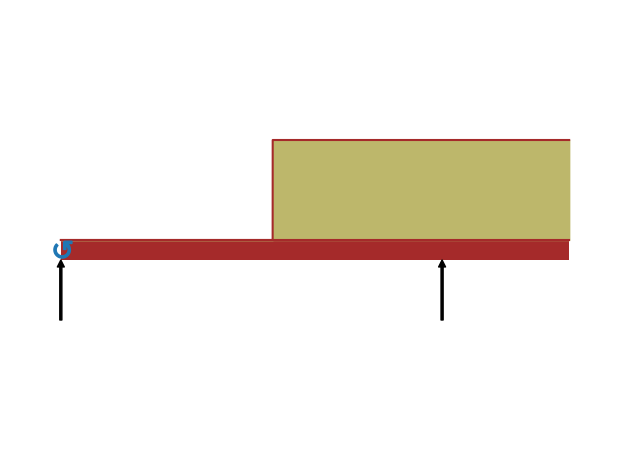

{RP_0: -188390000/729, RD_0: -15730000/729, RS_0: 1756000000/81}


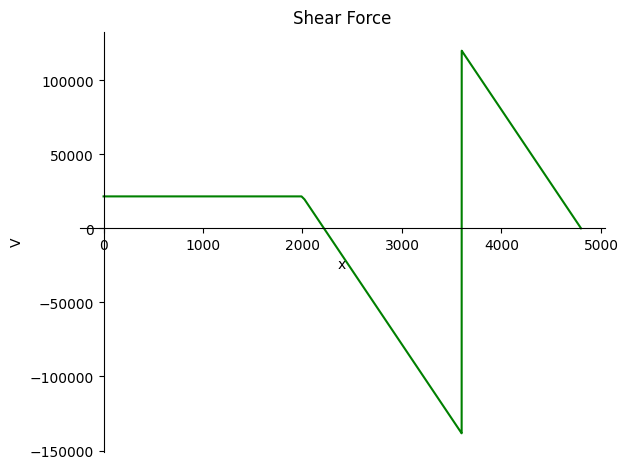

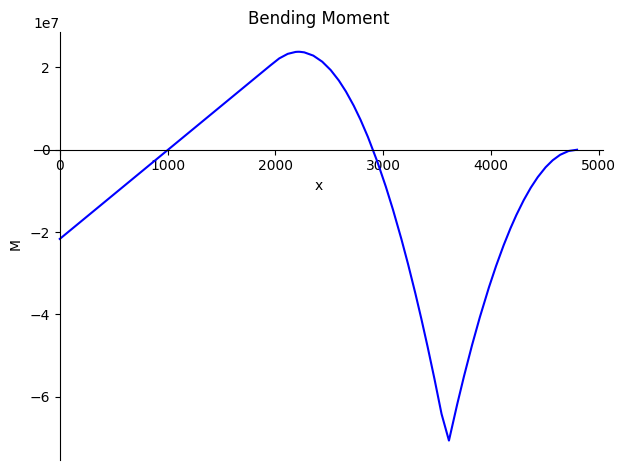

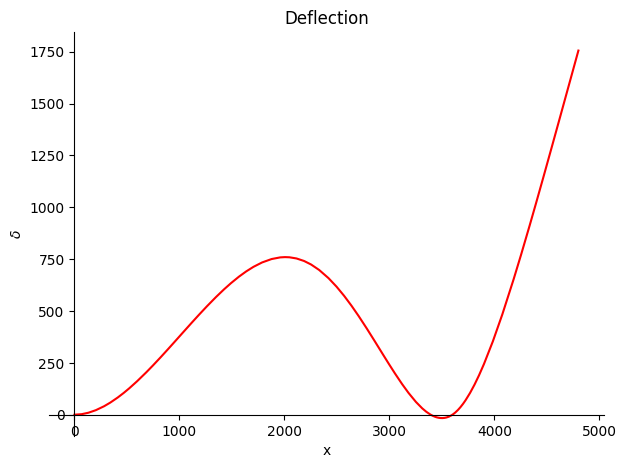

In [7]:
beam_data = beams[beam_id]

supports_acc = []
for idx, line in enumerate(beam_data):
    if idx == 0: # We know the first line always has L, E, I in it
        L_E_I = line
        beam = Beam(*L_E_I)
    elif 'P' in line: # Pinned supports have one reaction: shear
        for p_idx, support_loc in enumerate(line[1:]): # Skip the "P"
            RF = symbols(f"RP_{p_idx}")
            beam.apply_load(RF, support_loc, -1)
            beam.bc_deflection.append((support_loc, 0))
            supports_acc.append(RF)
    elif 'F' in line: # Fixed supports have two reactions: shear and moment
        for f_idx, support_loc in enumerate(line[1:]): # Skip the "F"
            RD = symbols(f"RD_{f_idx}")
            RS = symbols(f"RS_{f_idx}")
            beam.apply_load(RD, support_loc, -1)
            beam.apply_load(RS, support_loc, -2)
            beam.bc_deflection.append((support_loc, 0))
            beam.bc_slope.append((support_loc, 0))
            supports_acc.append(RD)
            supports_acc.append(RS)
    else:  # Everything else will just be a load
        beam.apply_load(*line)

beam.solve_for_reaction_loads(*supports_acc)
bp = beam.draw()
bp.show()
print(beam.reaction_loads)
beam.plot_shear_force()
beam.plot_bending_moment()
beam.plot_deflection()
    

# Task E

1. Change the title of this workbook from **Workbook 04** to **Multi-Beam Reader Script**
2. Change the titles of **Task A** to **Part A**, **Task B** to **Part B**, and so on
3. Insert a new code cell immediately after the **Multi_Beam Reader Script** cell and in it create the following variables:
    1. `file_name` and assign it the string which represents the file name of our beams file
    2. `beam_id` and assign it an integer of either `0`, `1`, or `2`; this represents which beam in our script we want to see
4. In **Part A**, replace your "hardcoded" filename in `open()` with the variable `file_name`
5. In **Part D**, replace your "hardcoded" beam index in `beam_data` with the variable `beam_id`
6. Try changing the `beam_id` at the top of your script and use your "Alt-r" keyboard shortcut to run the script from top to bottom see the different beam results each time.
7. Try adding an additional set of beam data to the "beams.txt" file and re-running the script to run that new data.

# ☄ Submit Workbook 04

This week's workbook had you creating a _full script_ for analyzing data. Here is a summary of the tasks you performed:

1. Read data from a file
2. Parse the data (process the raw data so it becomes meaningful)
3. Pass the data into an analysis library for processing and visualization
4. "Soft-code" all of the values so you can change any of the input data and re-run the script to give you new results
5. Set up the script to work kind of like a "program" (you change the input at the top and re-run to see new results)

This is a big deal! Pat yourself on the back because...YOU. ARE. PROGRAMMING. IN. PYTHON!

Now, you have a sense of how you can put code into separate cells to create a script out of a Jupyter notebook. However, do "real programmers" just script in Jupyter notebooks? No! The write "programs". Well, that's not entirely true: some folks do work exclusively in notebooks these days. 

However, next week we are going to teach you how to start structuring your code and going from "scripts" to "programs". We will do this with _functions_ and do it in such a way that you will have a mental framework allowing you to confidently build "programs".

# 